# Multi-Layered Perceptron Networks
## IE 7860 Winter 20202
## Kayleigh James

For this project I will be using a data set from the University of California - Irvine repository regarding diagnosis of breast cancer from attributes of an image of the mass:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

The attribute we will be predicting is diagnosis (benign or malignant).  This is a **binary classification** problem.  The other attributes available as predictors are as follows:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

To start we load in the .csv as a pandas dataframe:

In [1]:
import pandas as pd
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


We can disregard the id column as loading the dataset into a pandas dataframe assigns each pattern an index.  Now let's drop that column:

In [2]:
df = df.drop('id', axis=1)
df = df.drop('Unnamed: 32', axis=1)

We can also get some summary statistics of the data:

In [3]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


And the dimensions of the dataset:

In [4]:
df.shape

(569, 31)

So we can see that we have 569 observations (i.e. patterns) and 31 inputs.  We should also check and see how balanced our classes are: 

In [5]:
df[df.diagnosis == 'M'].shape[0]

212

So we have 212 observations of malignant tumors which means we have 357 observations of benign tumors. This is pretty balanced so I don't think it is necessary to balance the dataset.

Before we continue we should make sure all of the features are the data type we're anticipating (floating point numbers aside from the diagnosis).

In [6]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

We can see that the dataframe contains values in the type that we expect.  Now let's see if any cleaning is needed by checking for observations will NULL values.

In [7]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

We can see that there are no null values in the data set so let's check if there are any duplicates.

In [8]:
df.duplicated().sum()

0

We have confirmed there are no duplicates in the data.  Now we need to to get the data in the correct format and normalize it, we will use the sklearn package to do so.  We normalize the inputs in order to prevent an unstable and slow learning process.  The standard scaler will transform the input variables so that they are Gaussian with 0 mean and unit variance.  We encode the output variable in order for the neural network to make sense of it.

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

#X is the input dataset
X = df.iloc[:,1:]

#y are the class labels/expected outputs
y = df.iloc[:,0]

#for y, we want to change the format from categorical to 1's and 0's, malignant will be 1, benign a 0
le = LabelEncoder()
y = le.fit_transform(y)

#for X, we need to scale all of the values before feeding into the neural network
scaler = StandardScaler()
X = scaler.fit_transform(X)

#form a test/train split, 15% of the data will be reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

Now that all of the data has been cleaned up and we have created a training set and a test set we can move onto building the neural network.  To do this we will be using Keras.  From a Keras tutorial on MLP for binary classification (https://keras.io/getting-started/sequential-model-guide) I decided to start out with the below architecture of 3 layers (input layer, a single hidden layer, and the output layer).  

The optimizer I chose was stoichiastic gradient descent as that was what was discussed in lecture.  The loss function I chose for this problem was binary cross entropy as this is the most commonly used loss function for binary classification problems.  

Regularization can be applied in order to prevent overfitting the model.  One of the most convenient ways to do this is through dropout.  Dropout is a technique where randomly selected neurons are ignored during training. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.  The effect is that the network becomes less sensitive to the specific weights of neurons. This results in a network that is more generalized and is less likely to overfit the training data.  Dropout rates in the 20%-50% range work well so I decided to go with 50% in order to make sure my model generalized well.  

To start out, I chose to only use 20 epochs to see how accurate the model could be while using a relatively small number of epochs.

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

#declare an artifical neural network
mlp = Sequential()

#Specify Network Parameters
mlp.add(Dense(64, input_dim=30, activation='relu'))
mlp.add(Dropout(0.5))
mlp.add(Dense(64, activation='relu'))
mlp.add(Dropout(0.5))

#The output layer must be a single node and the activation function for the final layer must be a sigmoid
mlp.add(Dense(1, activation='sigmoid'))

#Use a stoichiastic gradient descent optimizer with learning rate of 0.01 and momentum of 0.9
opt = SGD(lr=0.01, momentum=0.9)

#Build the netwrok
mlp.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#Use the training set to train the network
history = mlp.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=20,
          batch_size=128)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 512 samples, validate on 57 samples
Epoch 1/20
512/512 [==============================] - 0s 673us/step - loss: 0.6674 - acc: 0.5859 - val_loss: 0.5309 - val_acc: 0.8947
Epoch 2/20
512/512 [==============================] - 0s 26us/step - loss: 0.5754 - acc: 0.6934 - val_loss: 0.4368 - val_acc: 0.9474
Epoch 3/20
512/512 [==============================] - 0s 32us/step - loss: 0.4871 - acc: 0.8164 - val_loss: 0.3504 - val_acc: 0.9649
Epoch 4/20
512/512 [==============================] - 0s 34us/step - loss: 0.4236 - acc: 0.8496 - val_loss: 0.2863 - val_acc: 0.9649
Epoch 5/20
512/512 [==============================] - 0s 34us/step - loss: 0.3477 - acc: 0.8906 - val_loss: 0.2384 - val_acc: 0.9649
Epoch 6/20
512/512 [==============================] - 

Now that we've built and trained the model let's see the training and test accuracy.

In [11]:
_, train_acc = mlp.evaluate(X_train, y_train, verbose=0)
_, test_acc = mlp.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.969, Test: 0.982


We got a training accuracy of 0.969 and a test accuracy of 0.982.  Having a higher test accuracy than training accuracy signifies that the model generalized well and did not overfit the training data.  We can also plot the loss and accuracy for both the training and test set.

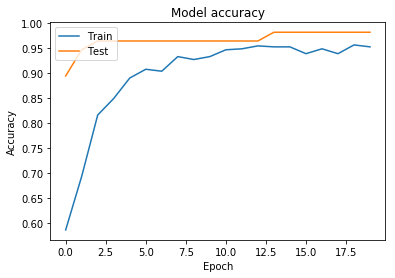

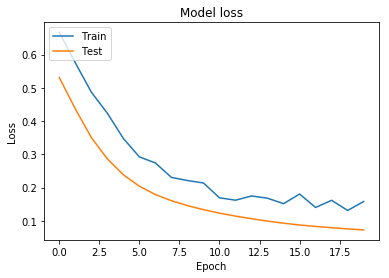

In [16]:
from matplotlib import pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Now let's compute the confusion matrix for the network on the test set.

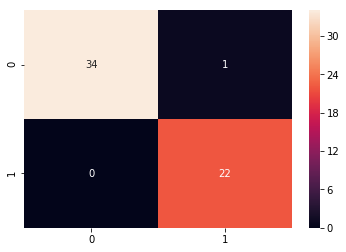

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Calculate y predicted of the test set
y_pred = mlp.predict(X_test)
y_pred = (y_pred > 0.5)

#Build a confusion matrix comparing the true values of y and the predicted values of y
matrix = confusion_matrix(y_test, y_pred)

#Plot the confusion matrix as a seaborn heatmap
sns.heatmap(matrix,annot=True)

We can see from the confusion matrix that we had 1 false positive and 0 false negatives.  Since the goal of this network is to predict whether or not a tumor is breast cancer, I would think that we would prefer to have false positives than false negatives.  If we have false positives we could perform a biopsy and confirm whether or not the tumor was malignant.  If we have a false negative the cost is higher as we could potentially tell someone they did not have cancer when, in fact, they did.

Overall, I think this model performed well.  It did not over fit the data and generalized well as the accuracy for the test set was still very high.  It was able to do this with only 20 epochs and potentially it could have been even more accurate if there were more epochs or a larger training set.  The confusion matrix shows that only one pattern in the test set was not classified properly.  

Now I want to do a comparison of transfer functions and see if any of them have any clear benefits over the others.  Aside from the activation function all other hyperparameters will be held constant.  I will be changing the activation functions for the input and hidden layer (the output layer **must** have a sigmoid as the transfer function).  As there are many possibilities, I will have the input layer and hidden layer have the same transfer function.  I will compare sigmoid, softmax, and tanh activation function performance to the current model which uses relu.

Train on 512 samples, validate on 57 samples
Epoch 1/20
512/512 [==============================] - 1s 1ms/step - loss: 0.7160 - acc: 0.5918 - val_loss: 0.6728 - val_acc: 0.6140
Epoch 2/20
512/512 [==============================] - 0s 27us/step - loss: 0.7195 - acc: 0.5586 - val_loss: 0.6664 - val_acc: 0.6140
Epoch 3/20
512/512 [==============================] - 0s 27us/step - loss: 0.6813 - acc: 0.6152 - val_loss: 0.6590 - val_acc: 0.6140
Epoch 4/20
512/512 [==============================] - 0s 25us/step - loss: 0.7229 - acc: 0.5762 - val_loss: 0.6524 - val_acc: 0.6140
Epoch 5/20
512/512 [==============================] - 0s 29us/step - loss: 0.7013 - acc: 0.5586 - val_loss: 0.6457 - val_acc: 0.6140
Epoch 6/20
512/512 [==============================] - 0s 27us/step - loss: 0.6709 - acc: 0.6152 - val_loss: 0.6391 - val_acc: 0.6140
Epoch 7/20
512/512 [==============================] - 0s 27us/step - loss: 0.6893 - acc: 0.5820 - val_loss: 0.6331 - val_acc: 0.6140
Epoch 8/20
512/512 [=====

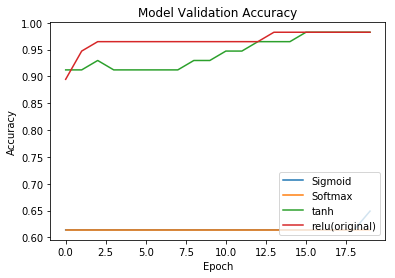

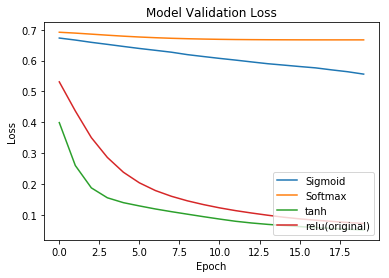

In [14]:
#declare an artifical neural network
mlp_sig = Sequential()
mlp_soft = Sequential()
mlp_tanh= Sequential()

#Specify Network Parameters
mlp_sig.add(Dense(64, input_dim=30, activation='sigmoid'))
mlp_sig.add(Dropout(0.5))
mlp_sig.add(Dense(64, activation='sigmoid'))
mlp_sig.add(Dropout(0.5))

mlp_soft.add(Dense(64, input_dim=30, activation='softmax'))
mlp_soft.add(Dropout(0.5))
mlp_soft.add(Dense(64, activation='softmax'))
mlp_soft.add(Dropout(0.5))

mlp_tanh.add(Dense(64, input_dim=30, activation='tanh'))
mlp_tanh.add(Dropout(0.5))
mlp_tanh.add(Dense(64, activation='tanh'))
mlp_tanh.add(Dropout(0.5))

#The output layer must be a single node and the activation function for the final layer must be a sigmoid
mlp_sig.add(Dense(1, activation='sigmoid'))
mlp_soft.add(Dense(1, activation='sigmoid'))
mlp_tanh.add(Dense(1, activation='sigmoid'))

#Use a stoichiastic gradient descent optimizer with learning rate of 0.01 and momentum of 0.9
opt = SGD(lr=0.01, momentum=0.9)

#Build the netwrok
mlp_sig.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
mlp_soft.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
mlp_tanh.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#Use the training set to train the network
history_sig = mlp_sig.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=20,
          batch_size=128)
history_soft = mlp_soft.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=20,
          batch_size=128)
history_tanh = mlp_tanh.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=20,
          batch_size=128)

# Plot Validation accuracy values
plt.plot(history_sig.history['val_acc'])
plt.plot(history_soft.history['val_acc'])
plt.plot(history_tanh.history['val_acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Sigmoid', 'Softmax', 'tanh', 'relu(original)'], loc='lower right')
plt.show()

# Plot Validation loss values
plt.plot(history_sig.history['val_loss'])
plt.plot(history_soft.history['val_loss'])
plt.plot(history_tanh.history['val_loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Sigmoid', 'Softmax', 'tanh', 'relu(original)'], loc='lower right')
plt.show()

As we can see in the validation plot, the hyperbolic tangent transfer function and relu have similar performance.  The sigmoid and softmax did not perform well at all.  Based on the loss plot it does seem that the tanh activation function outperformed the relu function.  Overall, I doesn't seem that changing the activation function has a large impact on model accuracy (as long as tanh or relu is selected). 

Finally, we will go back to the original model and see if adding additional hidden layers has a considerable impact on the network's performance.  

Train on 512 samples, validate on 57 samples
Epoch 1/20
512/512 [==============================] - 1s 1ms/step - loss: 0.7500 - acc: 0.5684 - val_loss: 0.5896 - val_acc: 0.7719
Epoch 2/20
512/512 [==============================] - 0s 28us/step - loss: 0.6778 - acc: 0.6367 - val_loss: 0.5186 - val_acc: 0.8421
Epoch 3/20
512/512 [==============================] - 0s 33us/step - loss: 0.5882 - acc: 0.7031 - val_loss: 0.4448 - val_acc: 0.8947
Epoch 4/20
512/512 [==============================] - 0s 33us/step - loss: 0.5248 - acc: 0.7695 - val_loss: 0.3801 - val_acc: 0.9123
Epoch 5/20
512/512 [==============================] - 0s 32us/step - loss: 0.4260 - acc: 0.8438 - val_loss: 0.3225 - val_acc: 0.9123
Epoch 6/20
512/512 [==============================] - 0s 35us/step - loss: 0.4160 - acc: 0.8027 - val_loss: 0.2724 - val_acc: 0.8947
Epoch 7/20
512/512 [==============================] - 0s 33us/step - loss: 0.3425 - acc: 0.8477 - val_loss: 0.2319 - val_acc: 0.9123
Epoch 8/20
512/512 [=====

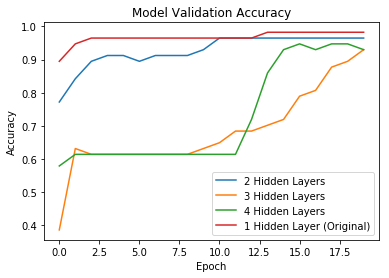

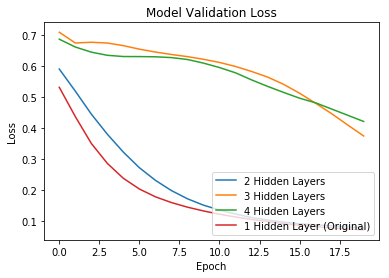

In [15]:
#declare an artifical neural network
mlp_2_hidden = Sequential()
mlp_3_hidden = Sequential()
mlp_4_hidden = Sequential()

#Specify Network Parameters
mlp_2_hidden.add(Dense(64, input_dim=30, activation='relu'))
mlp_2_hidden.add(Dropout(0.5))
mlp_2_hidden.add(Dense(64, activation='relu'))
mlp_2_hidden.add(Dropout(0.5))
mlp_2_hidden.add(Dense(64, activation='relu'))
mlp_2_hidden.add(Dropout(0.5))

mlp_3_hidden.add(Dense(64, input_dim=30, activation='relu'))
mlp_3_hidden.add(Dropout(0.5))
mlp_3_hidden.add(Dense(64, activation='relu'))
mlp_3_hidden.add(Dropout(0.5))
mlp_3_hidden.add(Dense(64, activation='relu'))
mlp_3_hidden.add(Dropout(0.5))
mlp_3_hidden.add(Dense(64, activation='relu'))
mlp_3_hidden.add(Dropout(0.5))
mlp_3_hidden.add(Dense(64, activation='relu'))
mlp_3_hidden.add(Dropout(0.5))

mlp_4_hidden.add(Dense(64, input_dim=30, activation='relu'))
mlp_4_hidden.add(Dropout(0.5))
mlp_4_hidden.add(Dense(64, activation='relu'))
mlp_4_hidden.add(Dropout(0.5))
mlp_4_hidden.add(Dense(64, activation='relu'))
mlp_4_hidden.add(Dropout(0.5))
mlp_4_hidden.add(Dense(64, activation='relu'))
mlp_4_hidden.add(Dropout(0.5))
mlp_4_hidden.add(Dense(64, activation='relu'))
mlp_4_hidden.add(Dropout(0.5))
mlp_4_hidden.add(Dense(64, activation='relu'))
mlp_4_hidden.add(Dropout(0.5))

#The output layer must be a single node and the activation function for the final layer must be a sigmoid
mlp_2_hidden.add(Dense(1, activation='sigmoid'))
mlp_3_hidden.add(Dense(1, activation='sigmoid'))
mlp_4_hidden.add(Dense(1, activation='sigmoid'))

#Use a stoichiastic gradient descent optimizer with learning rate of 0.01 and momentum of 0.9
opt = SGD(lr=0.01, momentum=0.9)

#Build the netwrok
mlp_2_hidden.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
mlp_3_hidden.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
mlp_4_hidden.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#Use the training set to train the network
history2 = mlp_2_hidden.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=20,
          batch_size=128)
history3 = mlp_3_hidden.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=20,
          batch_size=128)
history4 = mlp_4_hidden.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=20,
          batch_size=128)

# Plot Validation accuracy values
plt.plot(history2.history['val_acc'])
plt.plot(history3.history['val_acc'])
plt.plot(history4.history['val_acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['2 Hidden Layers', '3 Hidden Layers', '4 Hidden Layers', '1 Hidden Layer (Original)'], loc='lower right')
plt.show()

# Plot Validation loss values
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])
plt.plot(history4.history['val_loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['2 Hidden Layers', '3 Hidden Layers', '4 Hidden Layers', '1 Hidden Layer (Original)'], loc='lower right')
plt.show()

We can see from the plots that in terms of accuracy 1, 2, 3 or 4 hidden layers yielded around the same final validation accuracy.  For the models with 3 and 4 hidden layers it took a londer time to reach a decent accuracy.  We se similar results in the loss plot.  Overall, one or two hidden layers perform similarly, however, the model with only one hidden layer took fewer epochs to reach minimal loss and a high accuracy than the model with two hidden layers.  After comparing these different architectures, I would stick with the original model that had only one hidden layer.  

Overall we built a strong model with our first attempt!  We saw that using tanh as the activation function yielded similar results to using relu as the activation function.  We also saw that one or two hidden layers yielded similar results in similar amounts of time.  To save computation time I would stick with the single hidden layer.

As seen above with the original model, this model did generalize really well and yielded similar accuracy between the test and training set.  This is most likely due to using a relatively high drop out of 50% in order to regularize to minimize overfitting.  I feel confident in saying that we avoided the bias-variance dilemma (we beat variance because the model generalized well/did not have massively different test and training accuracies, and we beat bias as we had accuracies of above 90%).  